# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
data_rent = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data_rent.head(10))
data_rent.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Рассмотрим полученную информацию подробнее.

Всего в таблице 22 столбца 23699 строк, типы данных - float64, int64, object, bool.

Описание данных
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
•	balcony — число балконов
•	ceiling_height — высота потолков (м)
•	cityCenters_nearest — расстояние до центра города (м)
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)
•	first_day_exposition — дата публикации
•	floor — этаж
•	floors_total — всего этажей в доме
•	is_apartment — апартаменты (булев тип)
•	kitchen_area — площадь кухни в квадратных метрах (м²)
•	last_price — цена на момент снятия с публикации
•	living_area — жилая площадь в квадратных метрах(м²)
•	locality_name — название населённого пункта
•	open_plan — свободная планировка (булев тип)
•	parks_around3000 — число парков в радиусе 3 км
•	parks_nearest — расстояние до ближайшего парка (м)
•	ponds_around3000 — число водоёмов в радиусе 3 км
•	ponds_nearest — расстояние до ближайшего водоёма (м)
•	rooms — число комнат
•	studio — квартира-студия (булев тип)
•	total_area — площадь квартиры в квадратных метрах (м²)
•	total_images — число фотографий квартиры в объявлении

Количество значений в столбцах отличается. Это говорит о том, что в данных есть пропущенные значения.

Для проверки рабочих гипотез сначала нужно решить следующие проблемы:

•	Определить и заполнить пропущенные занчения
•	Заменить вещественный тип данных на целочисленный
•	Удалить дубликаты
•	Выполнить необходимые расчеты

Пропущены значения в столбцах:

ceiling_height - нужно установить среднее (стандартное) знаение высоты;
floors_total - установить кол-во этажей равное одному (частный сектор);
living_area - установить среднее значение в зависимости от общей площади;
is_apartment - перевести в булев тип;
kitchen_area - проверить соотношение с каиегорией студия или установить среднее значение;
balcony - пропущенные значения заменить на 0;
locality_name - проверить расстояние до центра города (Санкт-Петербург);
airports_nearest , cityCenters_nearest, parks_around3000, ponds_around3000 / parks_nearest, ponds_nearest - пропущенно примерно равное кол-во значений в двух категориях. Необходимо уточнить откуда полученны данные и почему допущено такое количество пропусков;
days_exposition - пропуски это не закрытые обьявления.

### Шаг 2. Предобработка данных

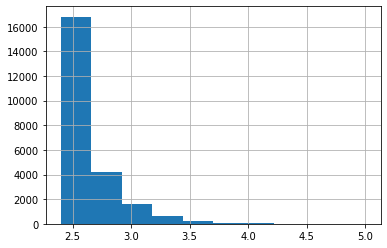

In [28]:
#data_rent['ceiling_height'].uinque()
#data_rent['ceiling_height'].hist(bins=100)
data_rent['ceiling_height'] = data_rent['ceiling_height'].fillna(2.4)
data_rent.loc[(data_rent['ceiling_height'] > 5) | (data_rent['ceiling_height'] < 2.4), 'ceiling_height'] = data_rent['ceiling_height'].median()
data_rent['ceiling_height'].hist(bins=10)


#display(data_rent['floors_total'].unique())
#display(data_rent[data_rent['floors_total'] > 35])
data_rent.loc[data_rent['floors_total'] == 60, 'floors_total'] = 6
data_rent['floors_total'] = data_rent['floors_total'].fillna(1)
data_rent['floors_total'] = data_rent['floors_total'].astype(int)


#display(data_rent['total_area'].median())       
#display(data_rent['living_area'].median())
data_rent['living_area'] = data_rent['living_area'].fillna(0) 

def new_living_area(row):
    old_living_area = row['living_area']
    new_living_area = row['total_area']*0.57
    
    if old_living_area == 0:  
        return  new_living_area
    return old_living_area

data_rent['additional_living_area'] = data_rent.apply(new_living_area, axis=1)


data_rent['is_apartment'] = data_rent['is_apartment'].fillna(0)
data_rent['is_apartment'] = data_rent['is_apartment'].astype(bool)


#display(data_rent['kitchen_area'].median())
data_rent['kitchen_area'] = data_rent['kitchen_area'].fillna(0) 

def new_kitchen_area(row):
    old_kitchen_area = row['kitchen_area']
    new_kitchen_area = row['total_area']*0.175
    
    if old_kitchen_area == 0:  
        return  new_kitchen_area
    return old_kitchen_area

data_rent['additional_kitchen_area'] = data_rent.apply(new_kitchen_area, axis=1)


data_rent['balcony'] = data_rent['balcony'].fillna(0)
data_rent['balcony'] = data_rent['balcony'].astype(int)


data_rent.dropna(subset =['locality_name'], inplace=True)


data_rent['airports_nearest'] = data_rent['airports_nearest'].fillna(0)
data_rent['cityCenters_nearest'] = data_rent['cityCenters_nearest'].fillna(0)
data_rent['parks_around3000'] = data_rent['parks_around3000'].fillna(0)
data_rent['ponds_around3000'] = data_rent['ponds_around3000'].fillna(0)
data_rent['parks_nearest'] = data_rent['parks_nearest'].fillna(0)
data_rent['ponds_nearest'] = data_rent['ponds_nearest'].fillna(0)


data_rent['first_day_exposition'] = pd.to_datetime(data_rent['first_day_exposition'], format='%Y-%m-%d')

def new_cityCenters_nearest(row):
    nearest = row['cityCenters_nearest']
    if nearest == 0:
        city = row['locality_name']
        city_column = data_rent[data_rent['locality_name']==city]
        column_nearest_mean = city_column['cityCenters_nearest'].mean()
        return column_nearest_mean
    return nearest

data_rent['new_cityCenters_nearest'] = data_rent.apply(new_cityCenters_nearest, axis=1)

В столбце ceiling_height были обработаны артефакты. Неправдоподобно маленькие и большие значения были приравнены к медиане (2.5м). Пустые значения были приравнены к минимальному значению высоты (2.4м).

В столбце floors_total обработаны пустые значения и артефакты. Пустые значения могут быть связаны с частным сектором, поэтому этажность установлена как единица.

Пустые значения столбца living_area установлены в соответствии с общей площадью (total_area), с соотношением медиан (57%).

Столбец is_apartment приведен к булевому типу.

Пустые значения столбца kitchen_area установлены в соответствии с общей площадью (total_area), с соотношением медиан (17.5%).

В столбце balcony обработаны пустые значения и артефакты. Пустые значения могут быть связаны с частным сектором, поэтому этажность установлена как единица.

Строки с пустыми значениями locality_name были удалены (49 шт.).

Пустым значениям столбцов airports_nearest , cityCenters_nearest, parks_around3000, ponds_around3000 / parks_nearest, ponds_nearest присвоены нулевые значения.

Столбец first_day_exposition приведен в формат Год - Месяц - День.

Лобавлено 133 значения в столбец new_cityCenters_nearest с учетом среднего показателя удаленности от центра близжайшего города. Остальные 5386 значений не имеют аналогов.

### Шаг 3. Посчитайте и добавьте в таблицу

In [29]:
def squere_metre_price(row):
    total_area = row['total_area']
    price = row['last_price']
    price_per_metre = price/total_area
    return price_per_metre

data_rent['squere_metre_price'] = data_rent.apply(squere_metre_price, axis=1)
data_rent['squere_metre_price'] = data_rent['squere_metre_price'].astype(int)

In [30]:
data_rent['weekday'] = data_rent['first_day_exposition'].dt.weekday
data_rent['month'] = data_rent['first_day_exposition'].dt.month
data_rent['year'] = data_rent['first_day_exposition'].dt.year

In [31]:
def category_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floors_total>1 and floors_total !=floor:
        return 'другой'
    return 'последний'

data_rent['category_floor'] = data_rent.apply(category_floor, axis=1)

In [32]:
def living_area_ratio(row):
    total_area = row['total_area']
    living_area = row['additional_living_area']
    ratio = living_area/total_area
    return ratio

data_rent['living_area_ratio'] = data_rent.apply(living_area_ratio, axis=1)

def kitchen_area_ratio(row):
    total_area = row['total_area']
    kitchen_area = row['additional_kitchen_area']
    ratio = kitchen_area/total_area
    return ratio

data_rent['kitchen_area_ratio'] = data_rent.apply(kitchen_area_ratio, axis=1)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

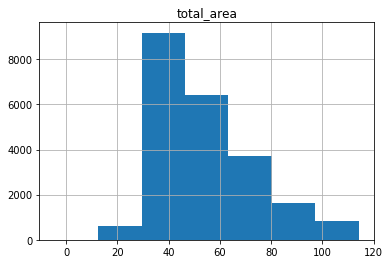

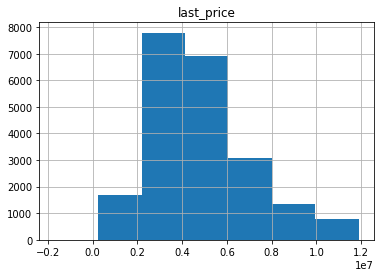

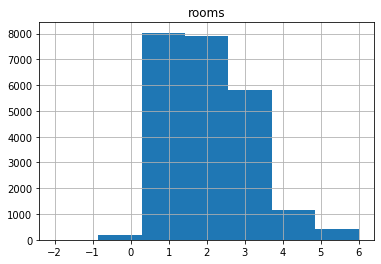

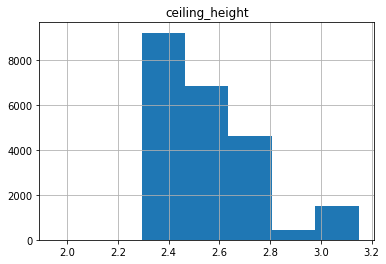

In [33]:
columns =['total_area','last_price','rooms','ceiling_height']
for element in columns:
    q75, q25 = np.percentile(data_rent[element], [75 ,25])
    iqr = q75 - q25
    plt.show(data_rent.hist(element, range=((q25 - 1.5*iqr),(q75 + 1.5*iqr)), bins=7))

Обычные гистограммы по параметрам - площадь, цена, число комнат, высота потолков не информативны из-за завышеных значений, необходимо применить срез данных для получения более полной картины.

180.7531998045921

95.0

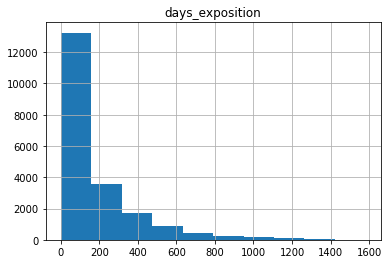

In [34]:
display(data_rent['days_exposition'].mean())
display(data_rent['days_exposition'].median())
plt.show(data_rent.hist('days_exposition'))

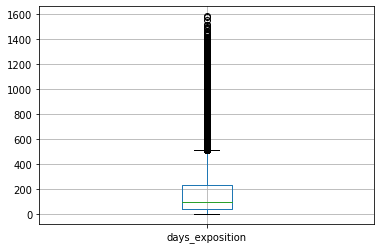

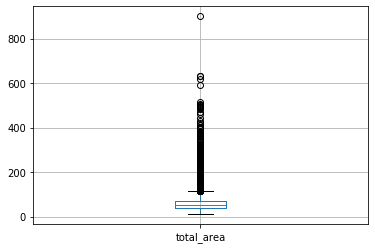

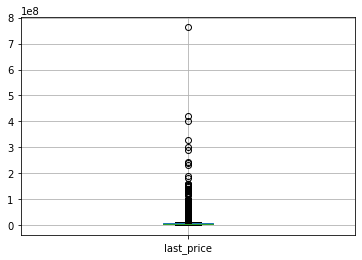

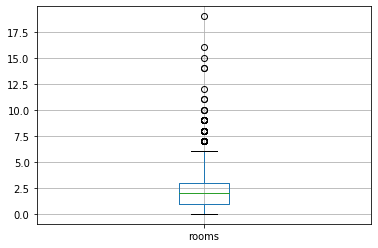

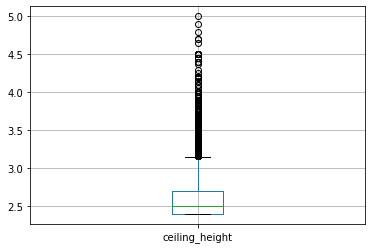

In [35]:
columns =['days_exposition','total_area','last_price','rooms','ceiling_height']
for element in columns:
    plt.show(data_rent.boxplot(element))

Часть графиков не информативна, поэтому нужно установить ограничения значений.

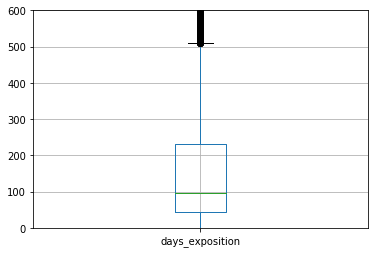

In [36]:
plt.ylim(0,600)
data_rent.boxplot('days_exposition')

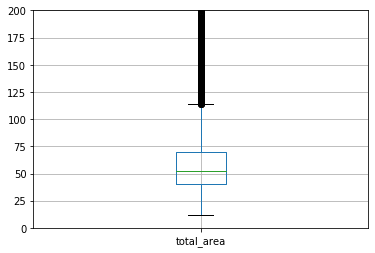

In [37]:
plt.ylim(0,200)
data_rent.boxplot('total_area')

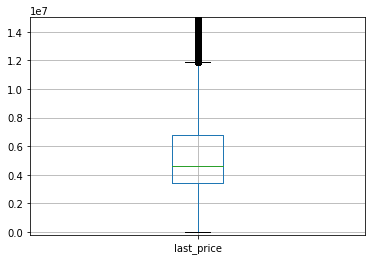

In [38]:
plt.ylim(-200000,15000000)
data_rent.boxplot('last_price')

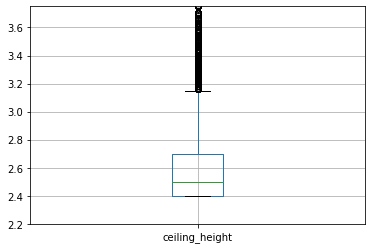

In [39]:
plt.ylim(2.2,3.75)
data_rent.boxplot('ceiling_height')

Среднее значение почти в два раза выше медианы, это говорит о том, что присутствует большой пул быстрых продаж, необходимо проверить значения близкие к нулю. Значения выше 500 дней - выбросы. Возможно, это связано с тем, что обьявления после продажи не закрыватся, а остаються открытыми. Аномально быстрые продажи - менее 3 дней (4шт), возможно, эти обьявления были сняты не из-за продажи квартиры а по другим причинам.

Для площади выборосы - это квартиры с площадью более 115 кв.м.

Цена квартиры более 12 млн. рублей выделяются из общей выборки, их следует исключить.

По диаграмме размаха кол-ва комнат видно выбивающиеся значения квартир с 6 и более комнатами (90шт). Часть из этих помещений занимают последние этажи (возможно пентхаусы или дома в частном секторе). Так же имеются помещения с нулевым количеством комнат, их следует исключить (197шт.).

В столбце с высотой потолков есть выбивающиеся значения более 3.15м.

In [40]:
good_data = (
    data_rent
    .query('(3< days_exposition < 500) and (ceiling_height < 3.15) and (0 < rooms < 5) and (last_price < 12000000) and (total_area < 115)')
)

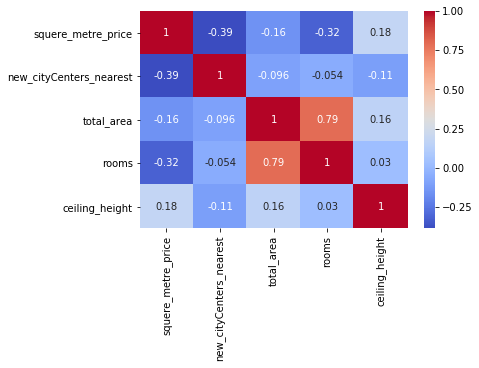

In [41]:
cityCenters_query = good_data.query('new_cityCenters_nearest > 0')

sns.heatmap(good_data[['squere_metre_price','new_cityCenters_nearest','total_area','rooms','ceiling_height']]
            .query('new_cityCenters_nearest > 0')
            .corr(), annot = True, fmt='.2g', cmap= 'coolwarm')

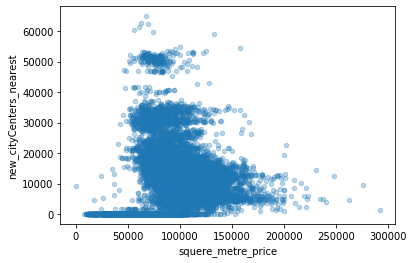

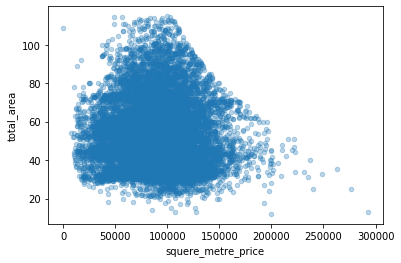

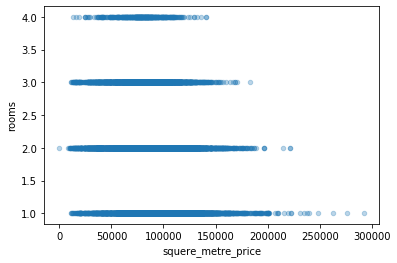

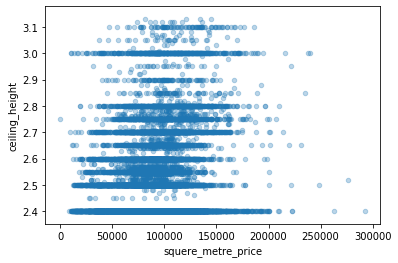

In [42]:
columns =['new_cityCenters_nearest','total_area','rooms','ceiling_height']
for element in columns:
    plt.show(good_data.plot(x='squere_metre_price', y=element, kind='scatter', alpha=0.3))

Наблюдается обратная зависимость цены кв.м. от площади квартиры (-0.16), дальности от центра города (-0.39) и кол-ва комнат (-0.31) - чем больше площадь квартиры, тем дешевле кв.м, чем ближе к центру, тем дороже (не противоречит логике) и чем больше комнат, тем меньше стоимость одного кв.м. Зависимость стоимости кв.м. от высоты потолков - прямая. Чем выше потолки тем дороже кв.м. жилья.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1274ba3490>,
      dtype=object)

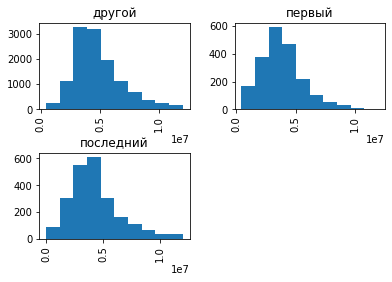

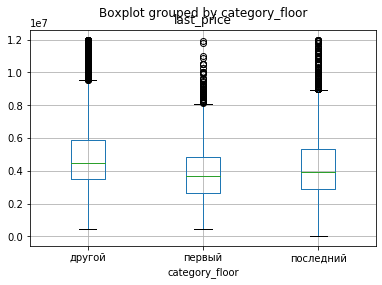

In [43]:
display(good_data[['category_floor','last_price']].hist('last_price', by = 'category_floor'))
display(good_data[['category_floor','last_price']].boxplot('last_price', by = 'category_floor'))

Обзор зависимости этажа на стоимость квартиры. У всех графиков наблюдается нормальное распределение. У "других" этажей нет выявленого большого кол-ва квартир по низким ценам, в отличии от первый и последний этажей. Стоимость "первых" этажей значительно ниже "других" и "последних", что можно увидеть на диаграмме размаха.

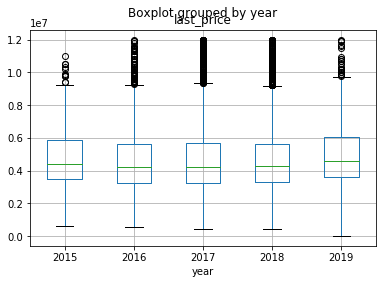

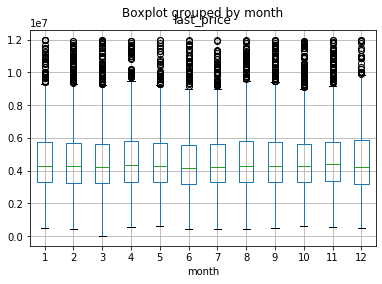

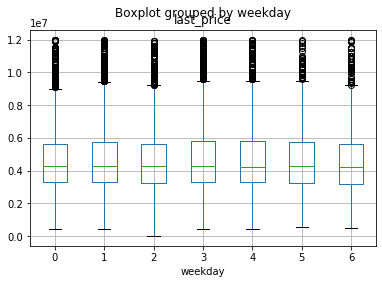

In [44]:
display(good_data[['year','last_price']].boxplot('last_price', by = 'year'))
display(good_data[['month','last_price']].boxplot('last_price', by = 'month'))
display(good_data[['weekday','last_price']].boxplot('last_price', by = 'weekday'))

Из графиков видно, что цена практически не меняется в зависимости от года/месяца/дня недели.

In [45]:
top_size_cities = (
    good_data[['locality_name','squere_metre_price']]
    .pivot_table(index='locality_name',values='squere_metre_price',aggfunc=['count','mean']))
top_size_cities.columns = ['count','mean']
top_size_cities['mean'] = top_size_cities['mean'].astype(int)
display(top_size_cities.sort_values(by='count', ascending=False).head(10))

,count,mean
locality_name,,
Санкт-Петербург,10655,104229
посёлок Мурино,458,85372
посёлок Шушары,375,77648
Всеволожск,298,66573
Колпино,283,74620
посёлок Парголово,282,89479
Пушкин,254,99254
деревня Кудрово,250,92349
Гатчина,240,68228


В таблице представлены топ10 населенных пунктов по кол-ву объявлений. В столбце mean указана средняя стоимость квадратного метра. Самая высокая стоимость квадратного метра в г. Санкт-Петербург, в г. Выборг наименьшая (из представленных).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


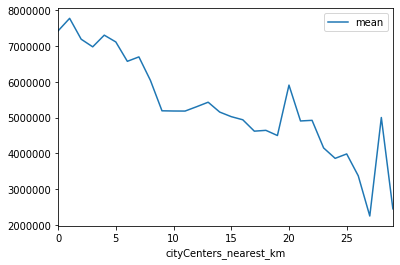

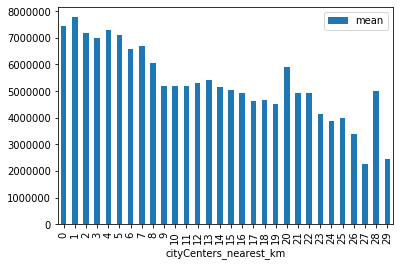

In [46]:
spb_good_data = good_data.query('locality_name == "Санкт-Петербург"')
spb_good_data['cityCenters_nearest_km'] = spb_good_data['new_cityCenters_nearest'] / 1000
spb_good_data['cityCenters_nearest_km'] = spb_good_data['cityCenters_nearest_km'].astype(int)

spb_good_data_by_km = (
    spb_good_data[['cityCenters_nearest_km','last_price']]
    .pivot_table(index='cityCenters_nearest_km',values='last_price',aggfunc='mean'))
spb_good_data_by_km.columns = ['mean']
spb_good_data_by_km['mean'] = spb_good_data_by_km['mean'].astype(int)
display(spb_good_data_by_km.plot())
display(spb_good_data_by_km.plot(kind='bar'))

При просмотре значений внутри города Санкт-Петербург видно, что график цены в зависимости от удаленности от центра сильно меняется после 8км. Поэтому, следует считать что центральная зона города находится в радиусе 8км от центра.

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.728808  0.795631        0.120382
last_price        0.728808    1.000000  0.448394        0.131571
rooms             0.795631    0.448394  1.000000        0.095058
ceiling_height    0.120382    0.131571  0.095058        1.000000


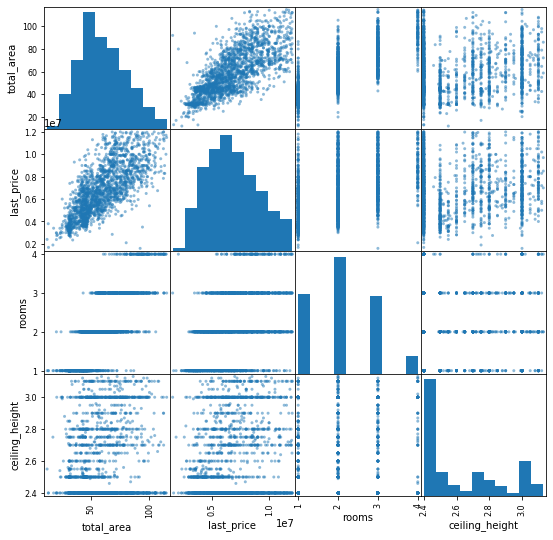

In [47]:
spb_centr = spb_good_data.query('cityCenters_nearest_km < 9')
spb_centr_reserch = spb_centr[['total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(spb_centr_reserch, figsize=(9, 9))
print(spb_centr_reserch.corr())

Построены диаграммы раcсеяния попарно для площади, цены, числа комнат и высоты потолков (всего 16 вариантов).

1) В верхней левой ячейке связь площади с площадью. Это обычная гистограмма распределения по площади. Видно, что больше всего квартир площадью 50-75 кв.м.
2) В ячейке ниже: связь цены и площади. Уровень цены и размер площади растут равномерно, цена может варьироваться в зависимости от удаленности от центра.
3) Кол-во комнат и площадь: чем больше комнат, тем больше площадь. 5 отрезков соответствуют 5 значениям кол-ва комнат.
4) Из диаграммы разброса в нижней левой ячейке можно сделать вывод, что высота потолка не зависит от площади помещения.
5) Гистограмма кол-ва комнат свидетельствует, что в выборке больше всего двухкомнатных квартир.
6) Гистограмма (last_price) сообщает, что больше всего квартир продается в ценовом диапазоне от 5 до 10 млн.руб.
7) Гистограмма высоты потолка указывает что большинство квартир имеют стандратную высоту потолков (2.4м.).
8) По другую сторону диагонали зеркально расположились те же данные, только оси поменялись местами.

Очевидно, что высокие значения корреляции присутствуют для связей площади - цены и кол-ва комнат - цены. Остальные значения не имеют ярко выраженной взаимосвязи.

In [48]:

def stat_grouped(data1,data2,column):
    stat_grouped1 = (
        data1
        .pivot_table(index=column, values='last_price', aggfunc='mean')
        )
    stat_grouped2 = (
        data2
        .pivot_table(index=column, values='last_price', aggfunc='mean')
        )
    
    stat_grouped1.columns = ['Город']
    stat_grouped2.columns = ['mean2']
    stat_grouped1['Центр'] = stat_grouped2['mean2']
    
    stat_grouped1.plot(kind='bar', figsize=(4,4), title=column)
    plt.show()

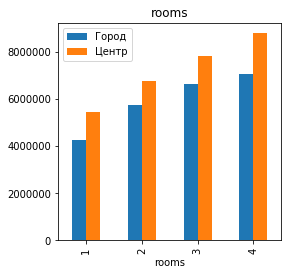

None

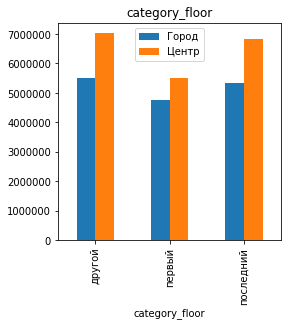

None

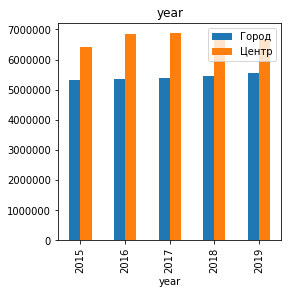

None

In [49]:
display(stat_grouped(spb_good_data,spb_centr,'rooms'))
display(stat_grouped(spb_good_data,spb_centr,'category_floor'))
display(stat_grouped(spb_good_data,spb_centr,'year'))

Факторы, которые влияют на стоимость квартиры (число комнат, этаж, дата размещения объявления) имеют одинаковое влияние как в центре города , так и на окраине (незначительно снизилась стоимость квартир в центре в 2018/2019 годах).

### Шаг 5. Общий вывод

В ходе работы были проанализированны данные о рынке нидвижимости в Ленинградской области.

На этапе обработки данных были обработаны пропущенные значния, но часть параметров установить не удалось - данные, которые поступают автоматически, на основе картографических данных. Необходимо рассмотреть эту проблему подробнее.
Так же, были рассмотрены срезы данных и убраны критические значения (выбросы), которые могли повлиять на конечную оценку результатов исследования.
Были обнаружены аномально долгие продажи квартир. Возможно, это связано с тем что обьявления не закрываются после продажи (эти обьявления могут публиковать агенства недвижимости с целью привлечения клиентов).

В таблицу с данными были добавлены следующие значения: 
•	цена квадратного метра;
•	день недели, месяц и год публикации объявления;
•	этаж квартиры; варианты — первый, последний, другой;
•	соотношение жилой и общей площади, а также отношение площади кухни к общей.

Проведен исследовательский анализ данных.
Были исключены нерелевантные зачения (выбросы) продажи выше 500 дней, квартиры с площадью более 115 кв.м., цены более 12 млн. рублей, квартиры с 6 и более комнатами и высотой потолков 3.15м.

Были изучены самые крупные населленые пункты (топ10) и детально разобран рынок недвижимости в г. Санкт- Петербург. 
Типичная квартира в Ленинградской области: 2 комнаты, общая площадь - 55 кв.м., средняя цена - 4.8 млн.р., высота потолка - 2.5 м., продается в среднем за 100 дней.
Наблюдается обратная зависимость цены кв.м. от площади квартиры (-0.16), дальности от центра города (-0.39) и кол-ва комнат (-0.31).

Была определена центральная зона Санкт-Петербурга (центральная часть - в пределах 8 км. от центра), а так же рассмотрены факторы, влияющие на стоимость недвижимости (число комнат, этаж, дата размещения объявления). Центральная часть города имеет более высокие расценки, но влияение прочих факторов сопоставимо с остальной частью города. Высокое влияние на цену недвижимости имеют общая площадь помещения (коэффициент корреляции 0.73) и кол-во комнат (коэффициент корреляции 0.44).